In [ ]:
import pandas as reviews_of_lap_1
from sklearn.feature_extraction.text import TfidfVectorizer as reviews_of_laptd
from imblearn.over_sampling import SMOTE as reviews_of_lapsy
from collections import Counter as reviews_of_lapct
from sklearn.model_selection import train_test_split as reviews_of_lapnp
from sklearn.metrics import confusion_matrix as reviews_of_lapm
from sklearn.metrics import ConfusionMatrixDisplay as reviews_of_lapdi
from sklearn.metrics import precision_score as reviews_of_lap1
from sklearn.metrics import recall_score as reviews_of_lap2
from sklearn.metrics import accuracy_score as reviews_of_lap3
from sklearn.metrics import f1_score as reviews_of_lap4
from sklearn.tree import DecisionTreeClassifier as reviews_of_lapd
from sklearn.ensemble import RandomForestClassifier as reviews_of_laprd
from sklearn.ensemble import AdaBoostClassifier as reviews_of_lapabs
from sklearn.ensemble import GradientBoostingClassifier as reviews_of_lapgd

reviews_of_lap = reviews_of_lap_1.read_csv('Cleansed_laptop data.csv')
reviews_of_lap['rating'].unique()

array([5., 4., 3., 2., 1.])

In [ ]:
reviews_of_lap['rating']=reviews_of_lap['rating'].replace({1:0,2:0,3:0,4:1,5:1})
reviews_of_lap['rating'].value_counts()

rating
0.0    230
1.0    169
Name: count, dtype: int64

*** Replaced ratings  1,2,3=0 ; 4,5=1

In [ ]:
import nltk as reviews_of_lapnt
reviews_of_lapnt.download('stopwords')
import regex as reviews_of_lapex
from nltk.corpus import stopwords as reviews_of_lapsw
reviews_of_lapsw_En = reviews_of_lapsw.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
reviews_of_lapnt.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer as reviews_of_lapwn
reviews_of_lap_WL=reviews_of_lapwn()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def rew_lp(lp):
    lp = lp.lower()
    lp = reviews_of_lapex.sub("[^a-z]+", " ", lp)
    lp = " ".join([y for y in lp.split() if y not in reviews_of_lapsw_En])
    lp=' '.join([reviews_of_lap_WL.lemmatize(y) for y in lp.split()])
    return lp

In [ ]:
  lp_R=[]
  for rd in reviews_of_lap['comment']:
      lp_R.append(rew_lp(rd))
  lp_R[:30]

['even though laptop backlight keyboard performance good fast boot shut screen clarity sound clarity also good',
 'awesome display good performance',
 'laptop performance ok especially availability genuine window m office home edition along bunch software preloaded partition ssd local drive end keep program file c drive otherwise fast better performance th generation processor th generation heating issue dell laptop including one wait next month check whether heating issue creates problem performance laptop summer dell shall arrange direct blower towards screen present case opinion heat coming blower towards screen may reduce impact screen due heat blow laptop also heat think advisable keep lap leg better operate table platform',
 'performance good fast charging heated device adaptor',
 'like lightweight look performance medium till never hanged disliked heating problem backlight keyboard',
 'even though le month use faced problem lcd refuce replacement however repaired working lost co

In [ ]:
reviews_of_lap['comment']=lp_R
reviews_of_lap

,comment,rating
0,even though laptop backlight keyboard performa...,1.0
1,awesome display good performance,1.0
2,laptop performance ok especially availability ...,1.0
3,performance good fast charging heated device a...,1.0
4,like lightweight look performance medium till ...,0.0
...,...,...
394,heating issue youtube video playing lagging ca...,0.0
395,buy product u need backlite keyboard,0.0
396,using laptop month sometimes mouse pad laptop ...,0.0
397,face recognition fingerprint working option re...,0.0


In [ ]:
reviews_of_lapanl = reviews_of_laptd(analyzer='word')
reviews_of_lap_x = reviews_of_lapanl.fit_transform(reviews_of_lap['comment'].values.astype('U')).toarray()

In [ ]:
reviews_of_lap_y = reviews_of_lap['rating']
reviews_of_lap_x.shape

(399, 1297)

In [ ]:
print('Original reviews_of_lap datashape %s' % reviews_of_lapct(reviews_of_lap_y))
reviews_of_lapM = reviews_of_lapsy()
reviews_of_lap_x, reviews_of_lap_y = reviews_of_lapM.fit_resample(reviews_of_lap_x, reviews_of_lap_y)
print('Resampled reviews_of_lap datashape %s' % reviews_of_lapct(reviews_of_lap_y))

Original reviews_of_lap datashape Counter({0.0: 230, 1.0: 169})
Resampled reviews_of_lap datashape Counter({1.0: 230, 0.0: 230})


In [ ]:
reviews_of_lap_x.shape

(460, 1297)

In [ ]:
reviews_r = 33

In [ ]:
reviews_of_lap_xnn, reviews_of_lap_xss, reviews_of_lap_ynn, reviews_of_lap_yss = reviews_of_lapnp(reviews_of_lap_x, reviews_of_lap_y, test_size=.2, random_state= reviews_r)
reviews_of_lap_xvv, reviews_of_lap_xss, reviews_of_lap_yvv, reviews_of_lap_yss = reviews_of_lapnp(reviews_of_lap_xss, reviews_of_lap_yss, test_size= .5, random_state= reviews_r)

#### Decision Tree

Precision=  80.43478260869566
recall=  80.43478260869566
accuracy=  80.43478260869566
f1=  80.43478260869566


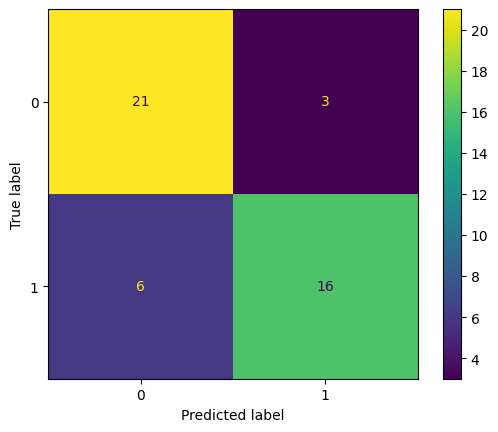

In [ ]:
reviews_of_lap_MEl1= reviews_of_lapd()
reviews_of_lap_MEl1.fit(reviews_of_lap_xnn, reviews_of_lap_ynn)

reviews_of_lap_pt= reviews_of_lap_MEl1.predict(reviews_of_lap_xvv)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  71.73913043478261
recall=  71.73913043478261
accuracy=  71.73913043478261
f1=  71.73913043478261


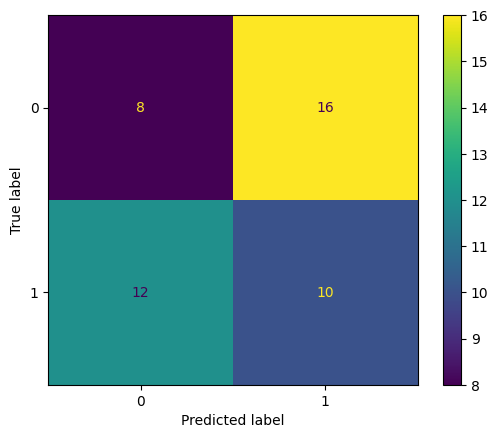

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl1.predict(reviews_of_lap_xss)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### Random Forest

Precision=  80.43478260869566
recall=  80.43478260869566
accuracy=  80.43478260869566
f1=  80.43478260869566


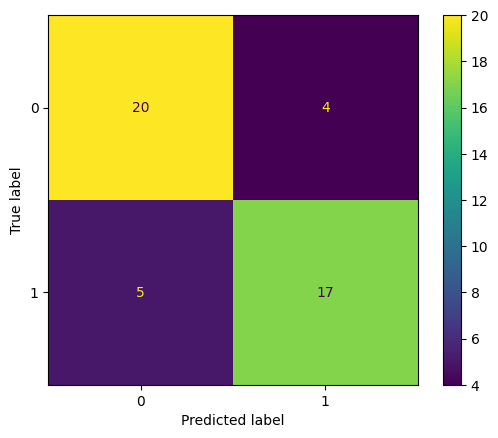

In [ ]:
reviews_of_lap_MEl2= reviews_of_laprd()
reviews_of_lap_MEl2.fit(reviews_of_lap_xnn, reviews_of_lap_ynn)

reviews_of_lap_pt= reviews_of_lap_MEl2.predict(reviews_of_lap_xvv)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  73.91304347826086
recall=  73.91304347826086
accuracy=  73.91304347826086
f1=  73.91304347826086


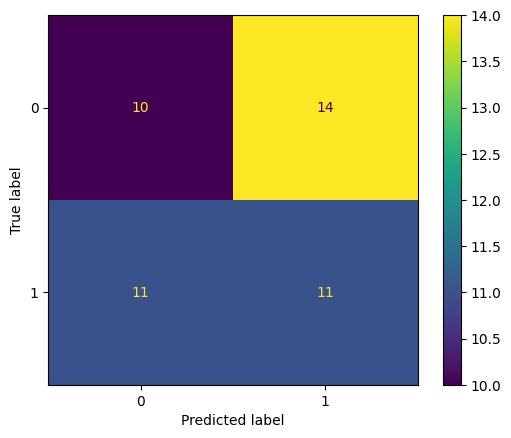

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl2.predict(reviews_of_lap_xss)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### AdaBoost

Precision=  76.08695652173914
recall=  76.08695652173914
accuracy=  76.08695652173914
f1=  76.08695652173914


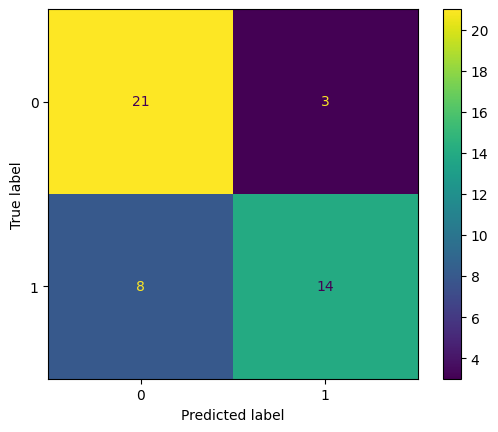

In [ ]:
reviews_of_lap_MEl3= reviews_of_lapabs()
reviews_of_lap_MEl3.fit(reviews_of_lap_xnn, reviews_of_lap_ynn)

reviews_of_lap_pt= reviews_of_lap_MEl3.predict(reviews_of_lap_xvv)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  82.6086956521739
recall=  82.6086956521739
accuracy=  82.6086956521739
f1=  82.6086956521739


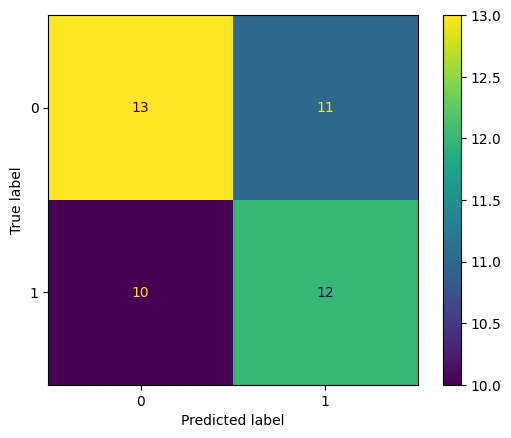

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl3.predict(reviews_of_lap_xss)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### Gradient Boosting classifiers

Precision=  78.26086956521739
recall=  78.26086956521739
accuracy=  78.26086956521739
f1=  78.26086956521739


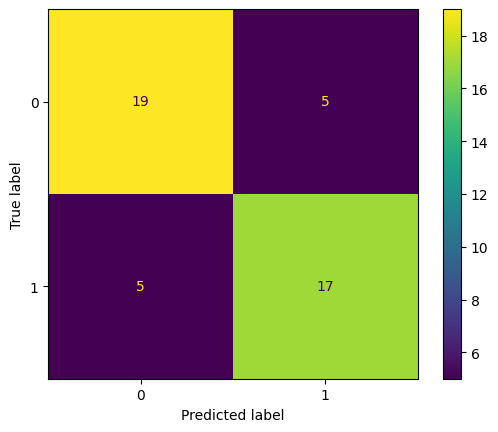

In [ ]:
reviews_of_lap_MEl4= reviews_of_lapgd()
reviews_of_lap_MEl4.fit(reviews_of_lap_xnn, reviews_of_lap_ynn)

reviews_of_lap_pt= reviews_of_lap_MEl4.predict(reviews_of_lap_xvv)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  78.26086956521739
recall=  78.26086956521739
accuracy=  78.26086956521739
f1=  78.26086956521739


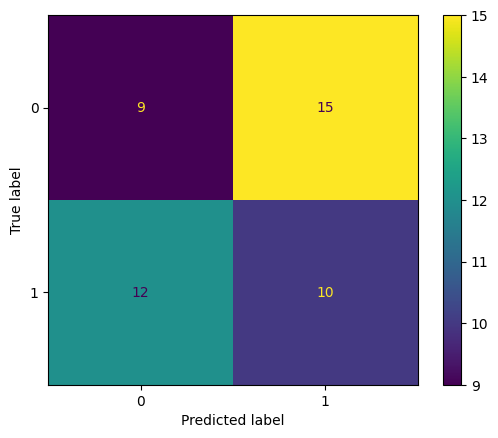

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl4.predict(reviews_of_lap_xss)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### Transformer

In [ ]:
import numpy as reviews_of_nmp
import tensorflow as reviews_of_tnsor
from tensorflow.keras.layers import Reshape as reviews_of_rshpe
from tensorflow.keras.layers import GlobalAveragePooling1D as reviews_of_gp1
from tensorflow.keras.models import Model as reviews_of_mdl
from tensorflow.keras.optimizers import Adamax as reviews_of_admx
from tensorflow.keras.layers import Input, Dense

r_unique = len(reviews_of_nmp.unique(reviews_of_lap['rating']))
r_ip_layer = Input(shape=(reviews_of_lap_xnn.shape[1],))

r_reshaped_ip = reviews_of_rshpe((reviews_of_lap_xnn.shape[1], 1))(r_ip_layer)

# Apply the Attention layer
r_attent = reviews_of_tnsor.keras.layers.Attention()([r_reshaped_ip, r_reshaped_ip])

r_reshap_attent = reviews_of_rshpe((-1, reviews_of_lap_xnn.shape[1]))(r_attent)

r_global_pool_lay = reviews_of_gp1()(r_reshap_attent)

r_op_layer = Dense(r_unique, activation='softmax')(r_global_pool_lay)

reviews_of_lap_MEl5 = reviews_of_mdl(inputs=r_ip_layer, outputs=r_op_layer)
reviews_of_lap_MEl5.compile(optimizer=reviews_of_admx(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
reviews_of_lap_MEl5.fit(reviews_of_lap_xnn, reviews_of_lap_ynn, epochs=10, batch_size=150, validation_data=(reviews_of_lap_xnn, reviews_of_lap_ynn))


Epoch 1/10
3/3 [==============================] - 1s 292ms/step - loss: 0.6932 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.4864
Epoch 2/10
3/3 [==============================] - 0s 49ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.4864
Epoch 3/10
3/3 [==============================] - 0s 24ms/step - loss: 0.6932 - accuracy: 0.4918 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 4/10
3/3 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.5217 - val_loss: 0.6931 - val_accuracy: 0.4946
Epoch 5/10
3/3 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5435 - val_loss: 0.6931 - val_accuracy: 0.5299
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5571
Epoch 7/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6931 - accuracy: 0.4837 - val_loss: 0.6931 - val_accuracy: 0.5462
Epoch 8/10
3/3 [==========

2/2 [==============================] - 0s 5ms/step
Precision=  56.52173913043478
recall=  56.52173913043478
accuracy=  56.52173913043478
f1=  56.52173913043478


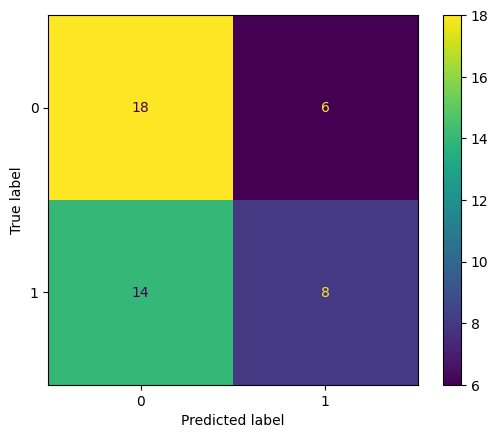

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl5.predict(reviews_of_lap_xvv)
reviews_of_lap_pt = reviews_of_nmp.argmax(reviews_of_lap_pt, axis=1)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

2/2 [==============================] - 0s 5ms/step
Precision=  52.17391304347826
recall=  52.17391304347826
accuracy=  52.17391304347826
f1=  52.17391304347826


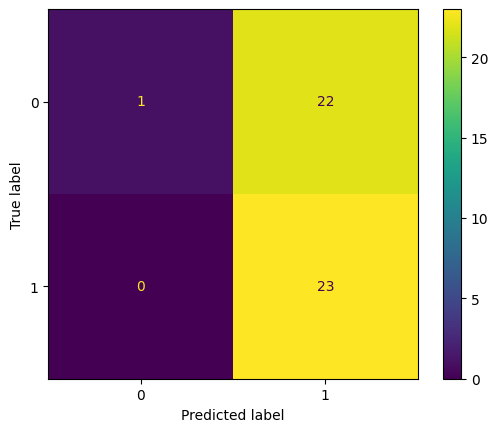

In [ ]:
reviews_of_lap_pt= reviews_of_lap_MEl5.predict(reviews_of_lap_xss)
reviews_of_lap_pt = reviews_of_nmp.argmax(reviews_of_lap_pt, axis=1)

reviews_tr = reviews_of_lapm(reviews_of_lap_yss,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

#### TabMLP

In [ ]:
# Convert data to PyTorch tensors
import torch as reviews_of_trch
import torch.nn as reviews_of_trchnn
import torch.optim as reviews_of_optim

reviews_of_lap_xnn = reviews_of_trch.tensor(reviews_of_lap_xnn, dtype=reviews_of_trch.float32)
reviews_of_lap_xvv = reviews_of_trch.tensor(reviews_of_lap_xvv, dtype=reviews_of_trch.float32)
reviews_of_lap_xss = reviews_of_trch.tensor(reviews_of_lap_xss, dtype=reviews_of_trch.float32)
reviews_of_lap_ynn = reviews_of_trch.tensor(reviews_of_lap_ynn.to_numpy(), dtype=reviews_of_trch.int64)
reviews_of_lap_yvv = reviews_of_trch.tensor(reviews_of_lap_yvv.values, dtype=reviews_of_trch.int64)
reviews_of_lap_yss = reviews_of_trch.tensor(reviews_of_lap_yss.values, dtype=reviews_of_trch.int64)

class Model_TabMLP(reviews_of_trchnn.Module):
    def __init__(self, in_dim, hid_dim, out_dim):
        super(Model_TabMLP, self).__init__()
        self.fc1 = reviews_of_trchnn.Linear(in_dim, hid_dim)
        self.relu = reviews_of_trchnn.ReLU()
        self.fc2 = reviews_of_trchnn.Linear(hid_dim, out_dim)

    def forward(self, rr):
        rr = self.fc1(rr)
        rr = self.relu(rr)
        rr = self.fc2(rr)
        return rr

in_dim = reviews_of_lap_xnn.shape[1]
hid_dim = 64
out_dim = 2

reviews_of_lap_MEl6 = Model_TabMLP(in_dim, hid_dim, out_dim)

# Define loss and optimizer
criterion = reviews_of_trchnn.CrossEntropyLoss()
optimizer = reviews_of_optim.Adamax(reviews_of_lap_MEl6.parameters(), lr=0.0001)

epoches_count = 20
for ep in range(epoches_count):
    optimizer.zero_grad()
    outputs = reviews_of_lap_MEl6(reviews_of_lap_xnn)
    loss = criterion(outputs, reviews_of_lap_ynn)
    loss.backward()
    optimizer.step()

In [ ]:

with reviews_of_trch.no_grad():
    out = reviews_of_lap_MEl6(reviews_of_lap_xvv)
    _, fld_out_MClass_R = reviews_of_trch.max(out, 1)

reviews_of_lap_pt= reviews_of_lap_MEl5.predict(reviews_of_lap_xvv)
reviews_of_lap_pt = reviews_of_nmp.argmax(reviews_of_lap_pt, axis=1)

reviews_tr = reviews_of_lapm(reviews_of_lap_yvv,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yvv, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yvv, reviews_of_lap_pt, average='micro')*100)

Precision=  45.65217391304348
recall=  45.65217391304348
accuracy=  45.65217391304348
f1=  45.65217391304348


In [ ]:
with reviews_of_trch.no_grad():
    out = reviews_of_lap_MEl6(reviews_of_lap_xss)
    _, fld_out_MClass_R = reviews_of_trch.max(out, 1)

reviews_of_lap_pt= reviews_of_lap_MEl5.predict(reviews_of_lap_xss)
reviews_of_lap_pt = reviews_of_nmp.argmax(reviews_of_lap_pt, axis=1)

reviews_tr = reviews_of_lapm(reviews_of_lap_yss,reviews_of_lap_pt)
reviews_of_lapdi(confusion_matrix = reviews_tr, display_labels = [0,1]).plot()

print("Precision= ", reviews_of_lap1(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("recall= ", reviews_of_lap2(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)
print("accuracy= ", reviews_of_lap3(reviews_of_lap_yss, reviews_of_lap_pt)*100)
print("f1= ", reviews_of_lap4(reviews_of_lap_yss, reviews_of_lap_pt, average='micro')*100)

Precision=  52.17391304347826
recall=  52.17391304347826
accuracy=  52.17391304347826
f1=  52.17391304347826
